In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = xr.open_dataset('DeepArvorGroundings_all_tids_v2.nc')
ds

<xarray.Dataset> Size: 531kB
Dimensions:          (N_GRD: 3908)
Dimensions without coordinates: N_GRD
Data variables: (12/17)
    LATITUDE         (N_GRD) float64 31kB ...
    LONGITUDE        (N_GRD) float64 31kB ...
    PROFILER_TYPE    (N_GRD) float64 31kB ...
    CYCLE_NUMBER     (N_GRD) float64 31kB ...
    WMO              (N_GRD) float64 31kB ...
    GROUNDING_DATE   (N_GRD) datetime64[ns] 31kB ...
    ...               ...
    LATITUDE_C0      (N_GRD) float64 31kB ...
    LATITUDE_C1      (N_GRD) float64 31kB ...
    LONGITUDE_C0     (N_GRD) float64 31kB ...
    LONGITUDE_C1     (N_GRD) float64 31kB ...
    LATITUDE_C2      (N_GRD) float64 31kB ...
    LONGITUDE_C2     (N_GRD) float64 31kB ...
Attributes:
    title:              Grounding data from Deep Arvor floats
    author:             Kevin Balem
    author_affilation:  IFREMER-LOPS
    author_contact:     kevin.balem@ifremer.fr
    date:               2024-01-15T08:35:25
    Processing 1:       Only grounding occuring during descent to profile are...
    Processing 2:       Corrected positions are calculated from the first GPS...

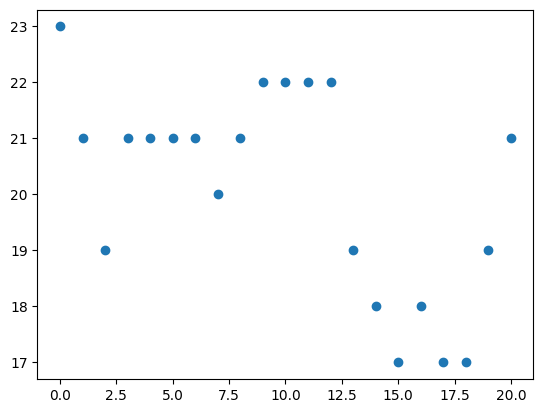

In [38]:
dsti = dst.where(dst['WMO']==6903557,drop=True)
plt.plot((dsti['PROFILE_DATE']-dsti['GROUNDING_DATE']).values.astype('timedelta64[h]').astype(int),'o')

In [28]:
ix=(ds['PROFILE_DATE']-ds['GROUNDING_DATE']).values.astype('timedelta64[h]').astype(int)>15
dst = ds.where(xr.DataArray(ix,dims='N_GRD'),drop=True)
np.unique(dst['WMO'])

array([3902126., 3902127., 3902128., 3902131., 3902132., 6901248.,
       6901602., 6901603., 6901632., 6901757., 6901758., 6901759.,
       6901760., 6901762., 6901763., 6902810., 6902811., 6902812.,
       6902819., 6903557.])

(array([  51., 1408., 1930.,   91.,   89.,  119.,  137.,   68.,   10.,
           5.]),
 array([ 4. ,  6.8,  9.6, 12.4, 15.2, 18. , 20.8, 23.6, 26.4, 29.2, 32. ]),
 <BarContainer object of 10 artists>)

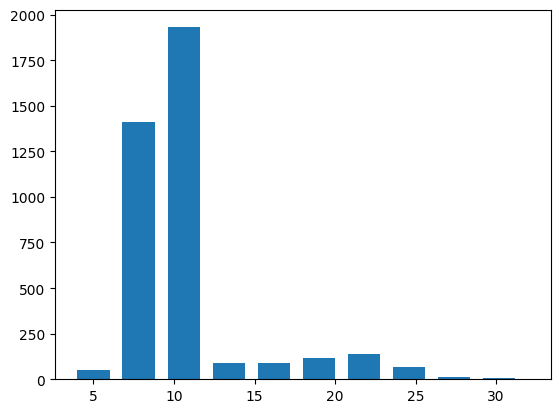

In [22]:
plt.hist((ds['PROFILE_DATE']-ds['GROUNDING_DATE']).values.astype('timedelta64[h]').astype(int),width=2)